In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import garnet_analysis as ga

In [ ]:
dump_path = r"D:\Local_D_KIST_Research\cloned_from_github_garnet-electrolyte-analysis_20250827\tmp-garnet-electrolyte-analysis\tests\Ef_0000_HZnAsO_LiPPdO_486\dump.traj"
data_path = r"D:\Local_D_KIST_Research\cloned_from_github_garnet-electrolyte-analysis_20250827\tmp-garnet-electrolyte-analysis\tests\Ef_0000_HZnAsO_LiPPdO_486\Ef_0000_HZnAsO_LiPPdO_486.data"
analyzer = ga.DiffusivityAnalyzer.from_lammps_dump(dump_path, data_path)

c:\Users\BANG\anaconda3\envs\test2_py312\Lib\site-packages\pymatgen\io\lammps\outputs.py:118: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, mode="rt") as file:


In [4]:
diffusivity = analyzer.calculate_diffusivity(species='Li', temperature=1000)

In [22]:
print(diffusivity)

DiffusivityResult(diffusivity=2.7458573695909636e-05, std_error=2.5393617443756883e-06, msd_slope=1.6477405102045612, time_range=(1.5, 396.0), temperature=1000, species='Li', n_data_points=788, r_squared=0.9979661867851133)


In [23]:
arrhenius = ga.ArrheniusAnalyzer()

In [24]:
arrhenius.add_data_point(1000, diffusivity.diffusivity, diffusivity.std_error)
arrhenius.add_data_point(900, 2.74E-06, 2.54E-06)

In [25]:
arrhenius.data_points

[ArrheniusDataPoint(temperature=1000, diffusivity=2.7458573695909636e-05, std_error=2.5393617443756883e-06),
 ArrheniusDataPoint(temperature=900, diffusivity=2.74e-06, std_error=2.54e-06)]

In [26]:
arrhenius.fit()

ArrheniusResult(slope=-9.00834670564111, intercept=4.447024680199397, slope_error=3.641333516461339, intercept_error=3.6455395343322885, activation_energy=1.7873799183983652, activation_energy_error=0.7224906651781342, r_squared=1.0, n_points=2, temperature_range=(900, 1000))

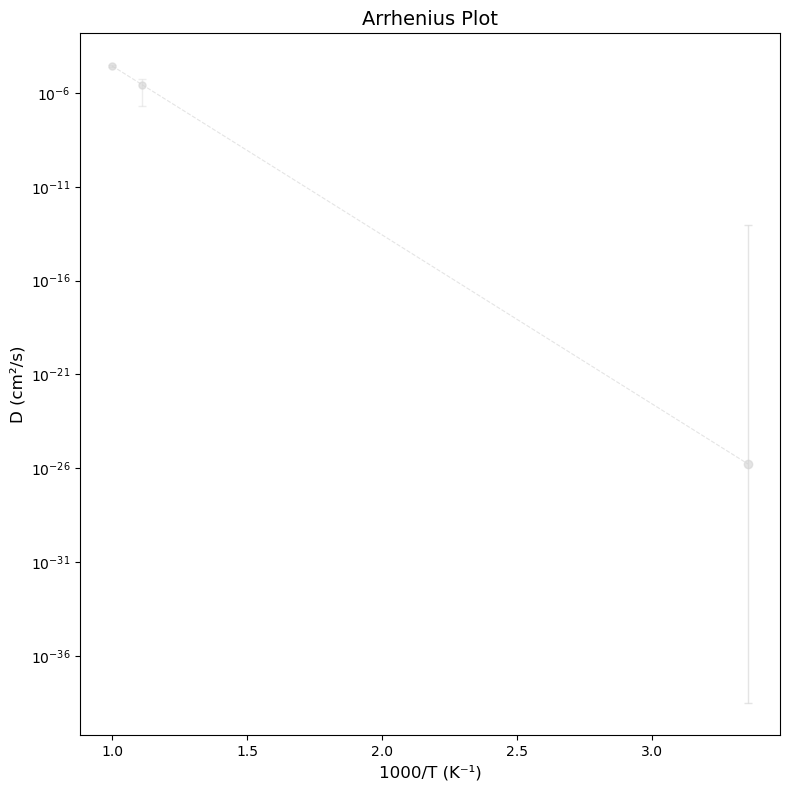

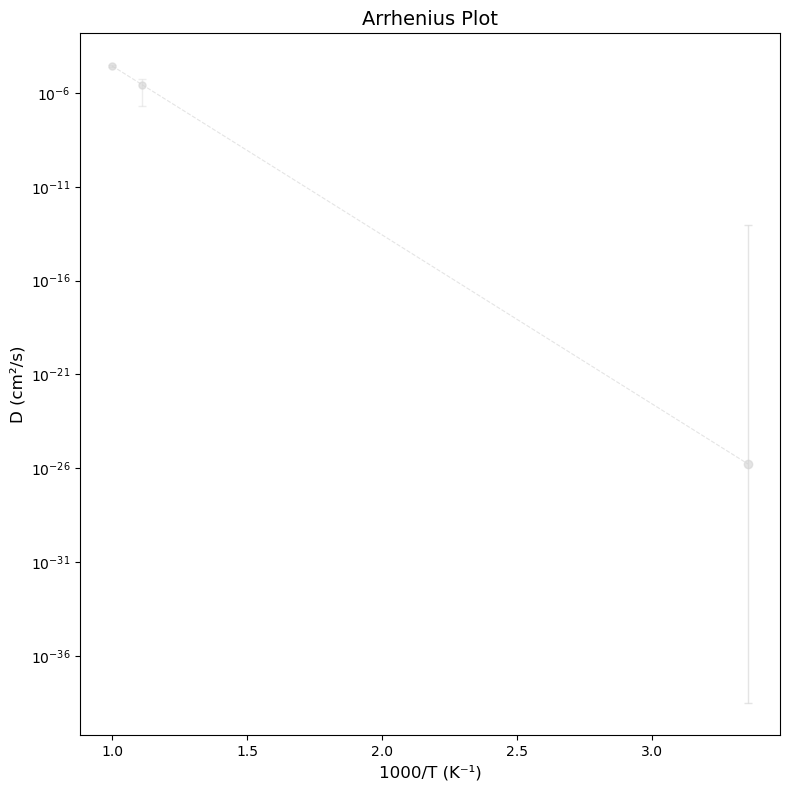

In [27]:
save_path = r"D:\Local_D_KIST_Research\cloned_from_github_garnet-electrolyte-analysis_20250827\tmp-garnet-electrolyte-analysis\tests\Ef_0000_HZnAsO_LiPPdO_486\test_arrhenius_plot.png"
ga.plot_arrhenius({'test_Ef_0000':arrhenius}, save_path=save_path)